## FEC Campaign Finance: 

### Individual contributions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime as dt
from matplotlib import font_manager as fm, rcParams
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
from matplotlib.offsetbox import (
    AnnotationBbox,
    OffsetImage, 
)

%matplotlib inline

In [2]:
year = '2020'

In [3]:
ccl = pd.read_csv('data/02/cand_comm_linkages_02a.csv')
ccl_dict = dict(zip(ccl['cmte_id'], ccl['cand_id']))
ccl.head()

,cand_id,cand_election_yr,cmte_id,cmte_tp,cmte_dsgn,cand_name
0,H0AL01055,2020,C00697789,cmte_House,Principal campaign committee,"CARL, JERRY LEE, JR"
1,H0AL01063,2020,C00701557,cmte_House,Principal campaign committee,"LAMBERT, DOUGLAS WESTLEY III"
2,H0AL01071,2020,C00701409,cmte_House,Principal campaign committee,"PRINGLE, CHRISTOPHER PAUL"
3,H0AL01089,2020,C00703066,cmte_House,Principal campaign committee,"HIGHTOWER, BILL"
4,H0AL01097,2020,C00708867,cmte_House,Principal campaign committee,"AVERHART, JAMES"


In [4]:
ccl['cmte_dsgn'].value_counts()

Principal campaign committee    1601
Joint fundraiser                 115
Authorized by a candidate         46
Unauthorized                      14
Leadership PAC                     7
Lobbyist/Registrant PAC            1
Name: cmte_dsgn, dtype: int64

In [5]:
cand = pd.read_csv('data/04/cand_cleaned_04a.csv')
cand_dict = dict(zip(cand['cand_id'], cand['cand_name']))
cand.head()

,cand_id,cand_name,cand_ici,cand_pty_affiliation,ttl_receipts,trans_from_auth,ttl_disb,trans_to_auth,coh_bop,coh_cop,...,comm__TACO BELL-RANCHO (against),comm__D'AMELIO LICHI (for),comm__MCDONALDS (against),comm__ROEDER LESLIE (for),comm__PARADIS RENEE (for),comm__SVIRSKY NINA (for),comm__BABAEV ELEANOR (for),comm__DEL TACO (against),comm__WINNING FOR WOMEN (for),comm__MCINTOSH KATE (for)
0,H0AL01055,"CARL, JERRY LEE, JR",O,Republican,964209.10,0.0,271256.93,0.0,0.0,692952.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,H0AL01063,"LAMBERT, DOUGLAS WESTLEY III",O,Republican,175564.96,0.0,98678.13,0.0,0.0,76886.83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,H0AL01071,"PRINGLE, CHRISTOPHER PAUL",O,Republican,394666.70,0.0,170268.29,0.0,0.0,224398.41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,H0AL01089,"HIGHTOWER, BILL",O,Republican,663456.00,0.0,293680.02,0.0,0.0,369775.98,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,H0AL01097,"AVERHART, JAMES",O,Democrat,31935.53,0.0,19871.75,0.0,0.0,12063.78,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
cm = pd.read_csv('data/03/committees_03a.csv')
cm_dict = dict(zip(cm['cmte_id'], cm['cmte_nm']))
cm.head()

,cmte_id,cmte_nm,tres_nm,cmte_st1,cmte_st2,cmte_city,cmte_st,cmte_zip,cmte_dsgn,cmte_tp,cmte_pty_affiliation,cmte_filing_freq,org_tp,connected_org_nm,cand_id,orig_tres_nm,orig_cmte_st1,address
0,C00000059,HALLMARK CARDS PAC,SARAH MOE,2501 MCGEE,MD #500,KANSAS CITY,MO,64108,Unauthorized,cmte_PACqual,UNK,M,org_Corporation,NaN,NaN,SARAH MOE,2501 MCGEE,"2501 MCGEE, KANSAS CITY, MO"
1,C00000422,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...,KEVIN WALKER,25 MASSACHUSETTS AVE NW,SUITE 600,WASHINGTON,DC,200017400,Lobbyist/Registrant PAC,cmte_PACqual,UNK,M,org_Membership organization,DELAWARE MEDICAL PAC,NaN,"WALKER, KEVIN MR.","25 MASSACHUSETTS AVE, NW","25 MASSACHUSETTS AVE NW, WASHINGTON, DC"
2,C00000489,D R I V E POLITICAL FUND CHAPTER 886,JERRY SIMS,3528 W RENO,NaN,OKLAHOMA CITY,OK,73107,Unauthorized,cmte_PACnonqual,UNK,Q,org_Labor organization,NaN,NaN,JERRY SIMS JR,3528 W RENO,"3528 W RENO, OKLAHOMA CITY, OK"
3,C00000547,KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMITTEE,JERRY SLAUGHTER,623 SW 10TH AVE,NaN,TOPEKA,KS,666121627,Unauthorized,cmte_PACqual,UNK,Q,org_Membership organization,KANSAS MEDICAL SOCIETY,NaN,JERRY SLAUGHTER,623 SW 10TH AVE,"623 SW 10TH AVE, TOPEKA, KS"
4,C00000638,INDIANA STATE MEDICAL ASSOCIATION POLITICAL AC...,GRANT ACHENBACH,322 CANAL WALK CANAL LEVEL,NaN,INDIANAPOLIS,IN,46202,Unauthorized,cmte_PACqual,UNK,T,org_Membership organization,NaN,NaN,"ACHENBACH, GRANT MR.","322 CANAL WALK, CANAL LEVEL","322 CANAL WALK CANAL LEVEL, INDIANAPOLIS, IN"


In [7]:
indiv = pd.read_csv(f'data/05/indiv_contrib_{year}.csv')
indiv['transaction_dt'] = [dt.strptime(x, '%Y-%m-%d') for x in indiv['transaction_dt']]
print(len(indiv))
indiv.head()

8668654


,cmte_id,amndt_ind,rpt_tp,transaction_pgi,image_num,transaction_tp,entity_tp,name,city,state,...,occupation,transaction_dt,transaction_amt,other_id,tran_id,file_num,memo_cd,memo_text,sub_id,cmte_nm
0,C00658591,T,Termination,P2018,201901309144175280,15C,CAN,"BOATNER, JOHN BURKE JR.",MEMPHIS,TN,...,SOCIAL WORKER,2018-03-02,100,H8TN08108,SA11AI.4448,1309123,X,NaN,4021920191640560740,BOATNER FOR CONGRESS
1,C00661868,N,July quarterly,P2020,201907159150856581,15E,IND,"HUTCHISON, BRUCE",CENTREVILLE,VA,...,DENTIST,2018-03-15,1001,C00000729,VVBEDKMFBA9,1340310,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4072220191660788442,VAN DREW FOR CONGRESS
2,C00669846,N,July quarterly,P2020,201907149150594699,15,IND,"TRAN, JORDAN",NaN,NaN,...,NaN,2018-03-27,500,NaN,SA11AI.4187,1339093,NaN,NaN,4072520191661313241,AYYAS FOR CONGRESS
3,C00669846,N,July quarterly,P2020,201907149150594698,15E,IND,"DONOR 1, DONOR1",NaN,NaN,...,NaN,2018-03-27,500,C00401224,SA11AI.4170,1339093,NaN,NaN,4072520191661313240,AYYAS FOR CONGRESS
4,C00669846,N,July quarterly,P2020,201907149150594698,15E,IND,"ALARB, ABEER",NaN,NaN,...,NaN,2018-03-27,550,C00401224,SA11AI.4175,1339093,NaN,NaN,4072520191661313238,AYYAS FOR CONGRESS


In [8]:
indiv['transaction_dt'].sort_values()[:20]

0    2018-03-02
1    2018-03-15
2    2018-03-27
3    2018-03-27
4    2018-03-27
5    2018-03-29
6    2018-03-30
7    2018-03-31
8    2018-04-01
9    2018-04-20
10   2018-05-04
11   2018-05-13
12   2018-05-23
13   2018-05-23
14   2018-05-31
15   2018-06-01
16   2018-06-01
17   2018-06-05
18   2018-06-12
19   2018-06-16
Name: transaction_dt, dtype: datetime64[ns]

In [16]:
indiv[indiv['cmte_nm'].apply(lambda x: 'ANAMO' in x)]

,cmte_id,amndt_ind,rpt_tp,transaction_pgi,image_num,transaction_tp,entity_tp,name,city,state,...,occupation,transaction_dt,transaction_amt,other_id,tran_id,file_num,memo_cd,memo_text,sub_id,cmte_nm
4170172,C00709600,N,July quarterly,P,201907090300282091,15,IND,"POWELL, ANISSA MICHEL",DECATUR,GA,...,INSERT,2019-07-15,31708,NaN,SA08291920911,1350156,NaN,NaN,2082920191672201719,ANAMO (AMERICA NEEDS A MAKEOVER)


In [18]:
ccl[ccl['cmte_id'] == 'C00709600']

,cand_id,cand_election_yr,cmte_id,cmte_tp,cmte_dsgn,cand_name
1547,P80003916,2020,C00709600,cmte_President,Principal campaign committee,MICHEL ANISSA POWELL DR


00_00


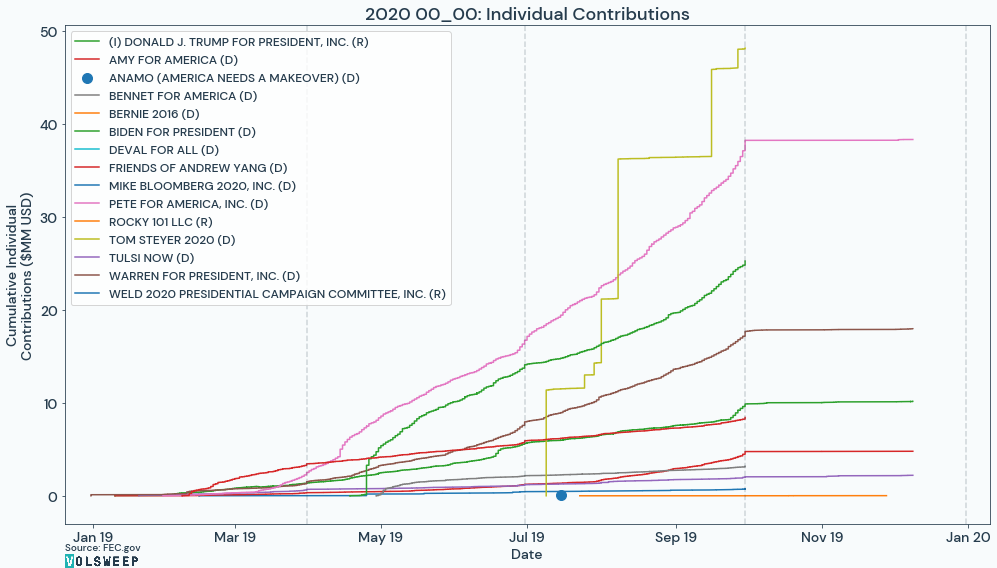

AK_00


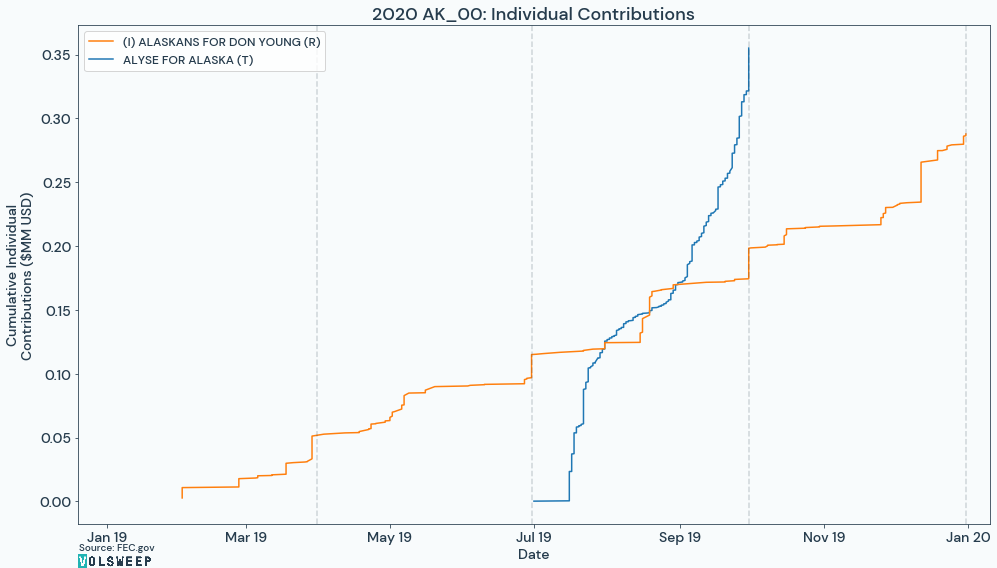

AK_senate


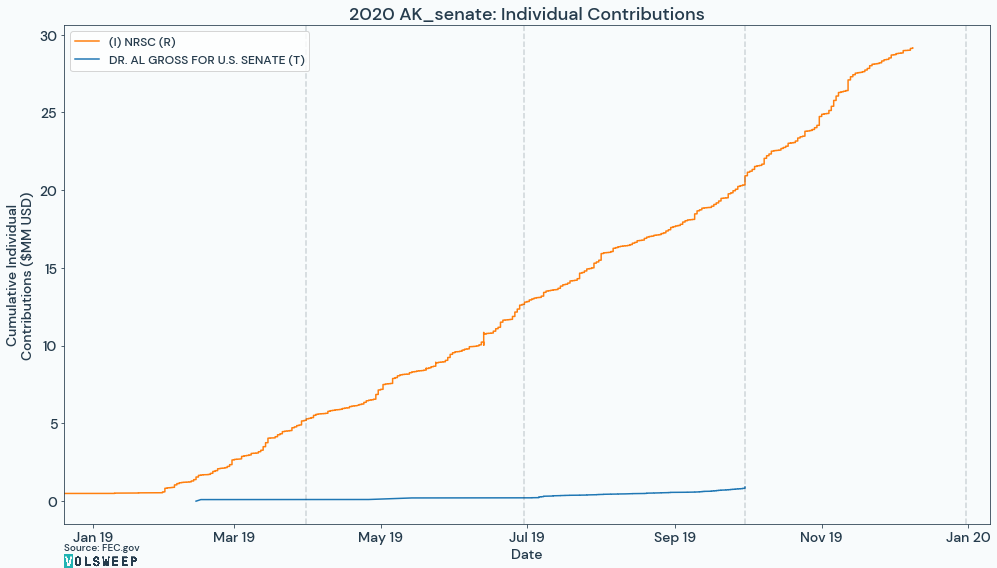

AL_01


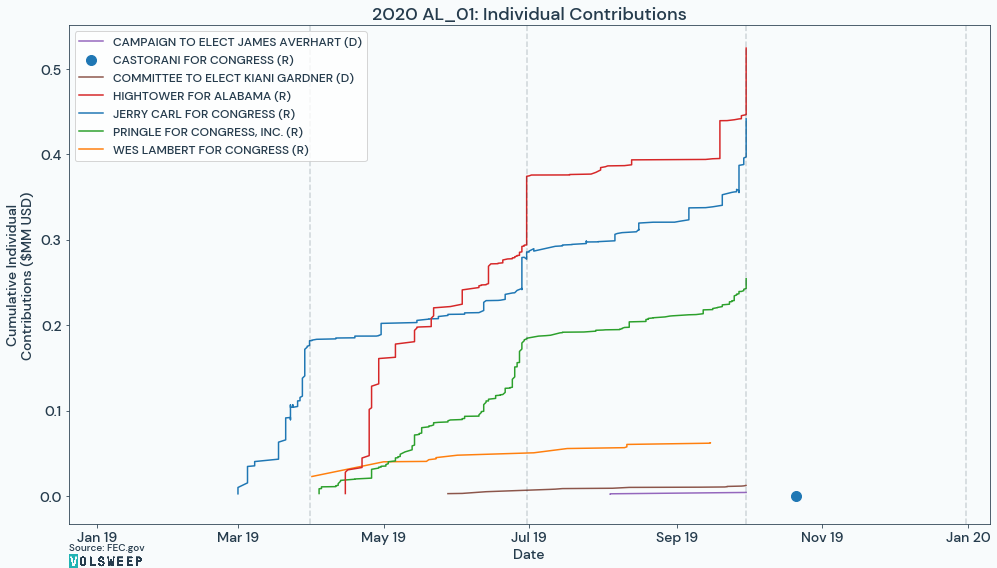

AL_02


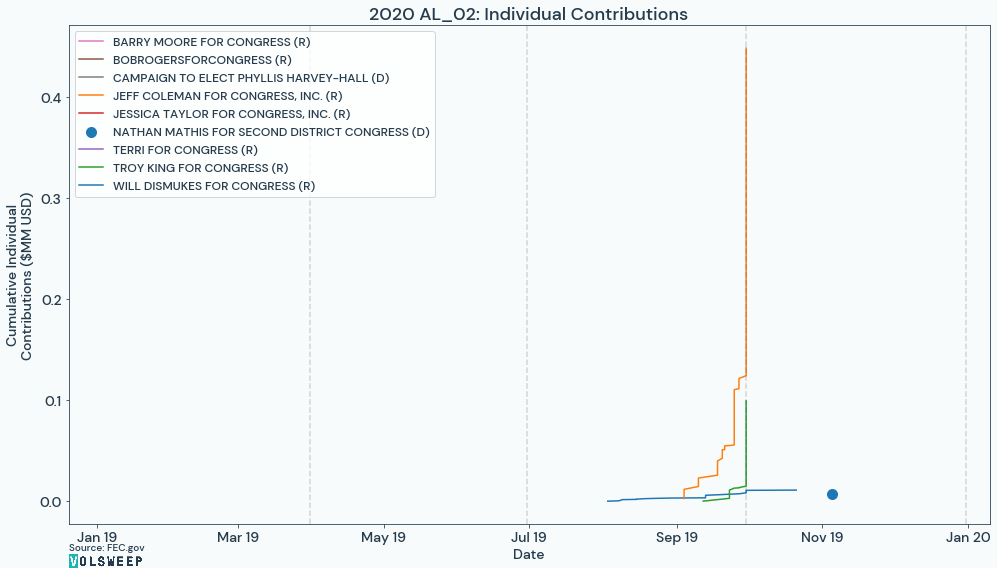

AL_03
AL_04


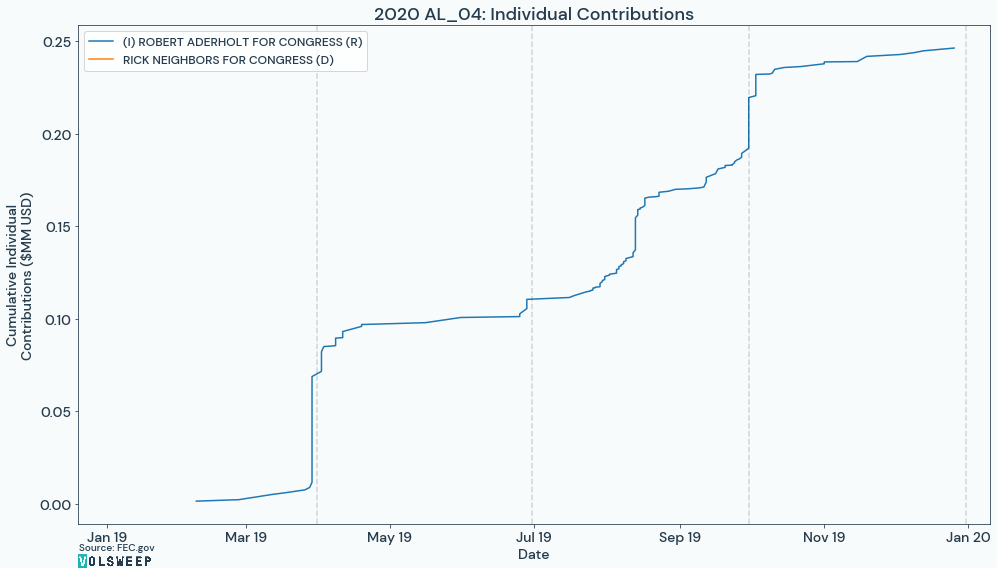

AL_05


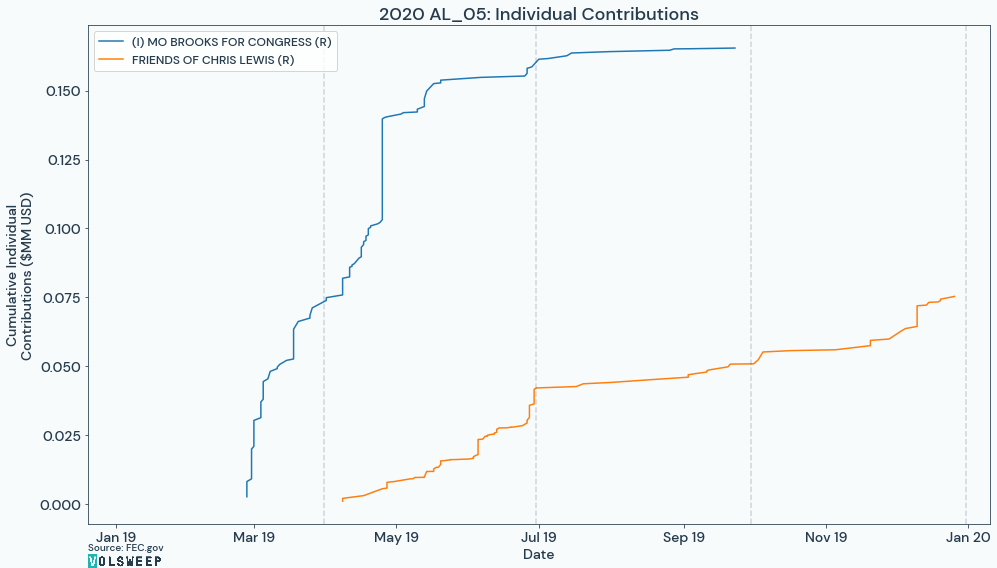

AL_06
AL_07
AL_senate


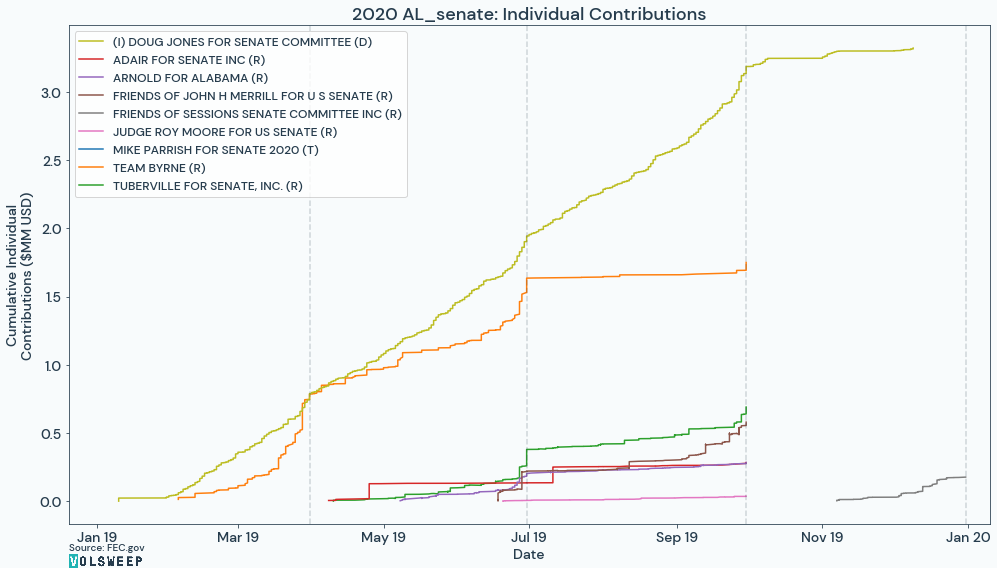

AR_01
AR_02


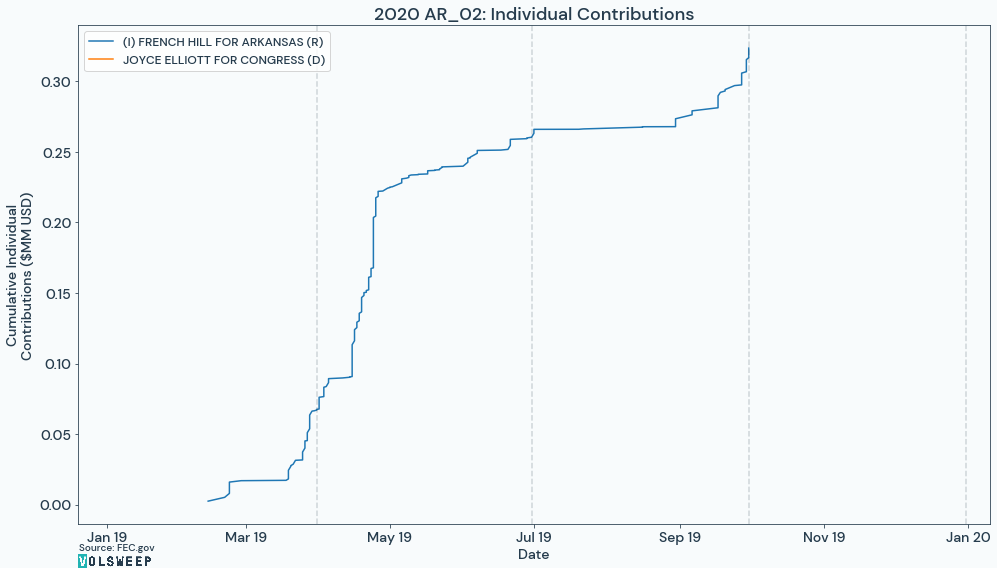

AR_03


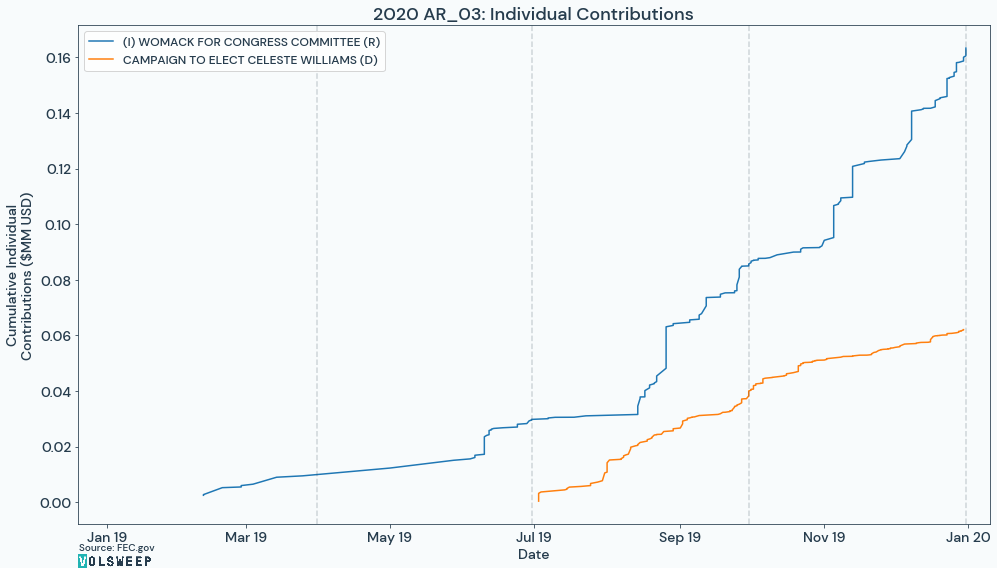

AR_04


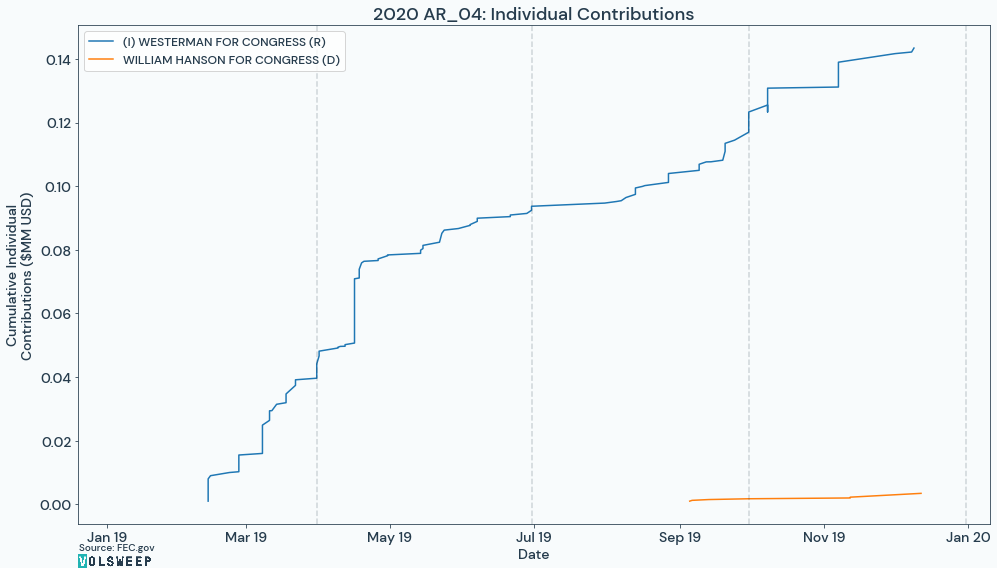

AR_senate
AS_00
AZ_01


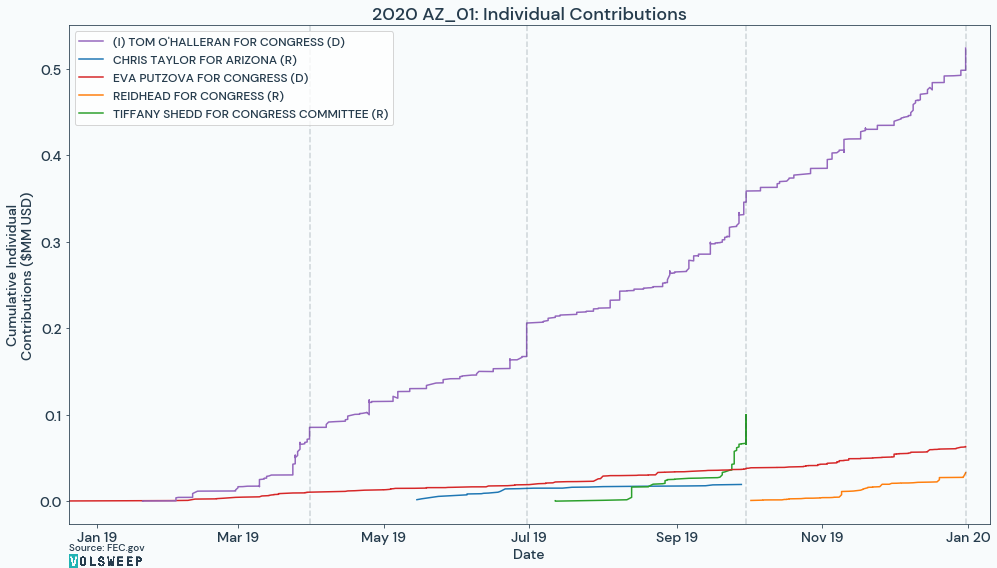

AZ_02


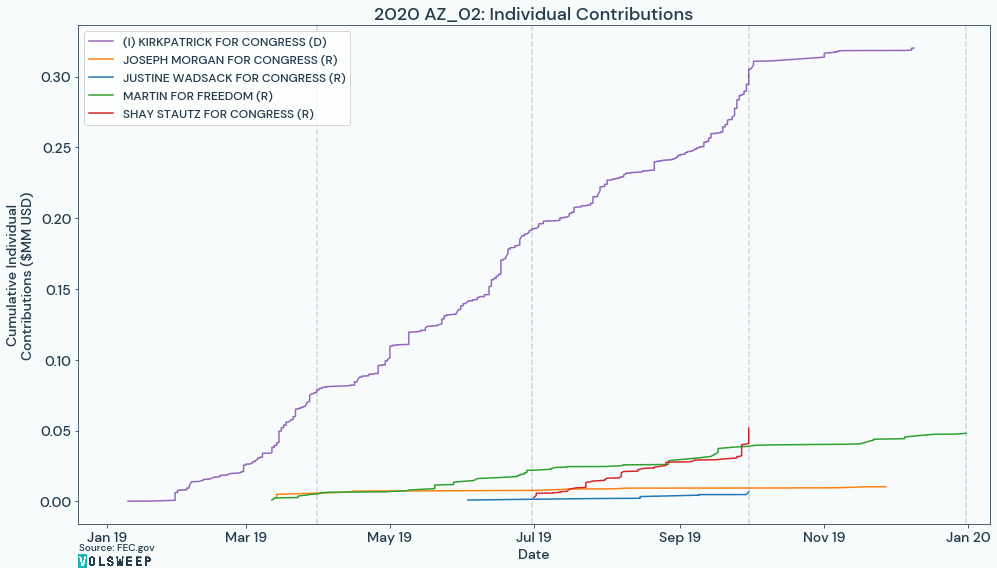

AZ_03
AZ_04


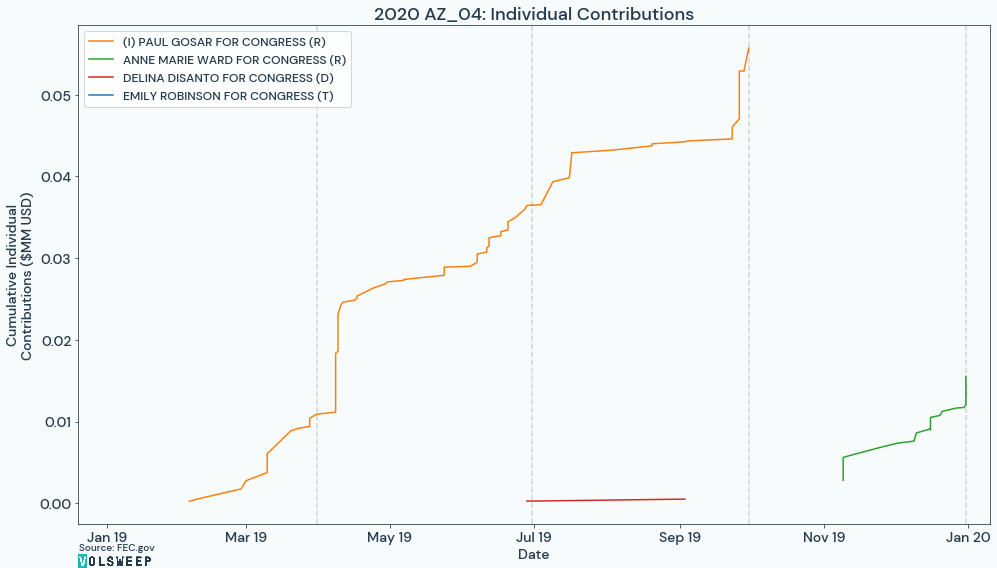

AZ_05


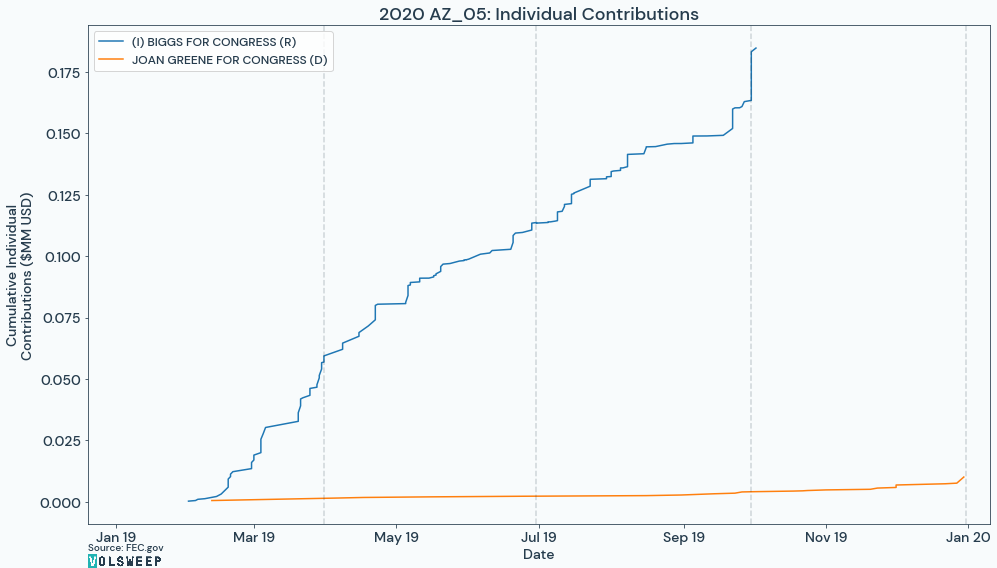

AZ_06


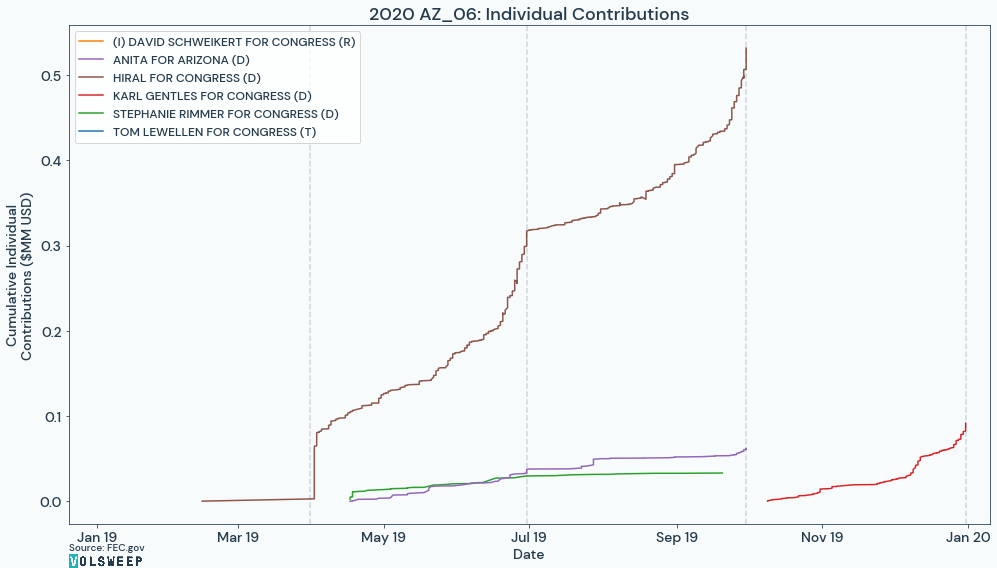

AZ_07


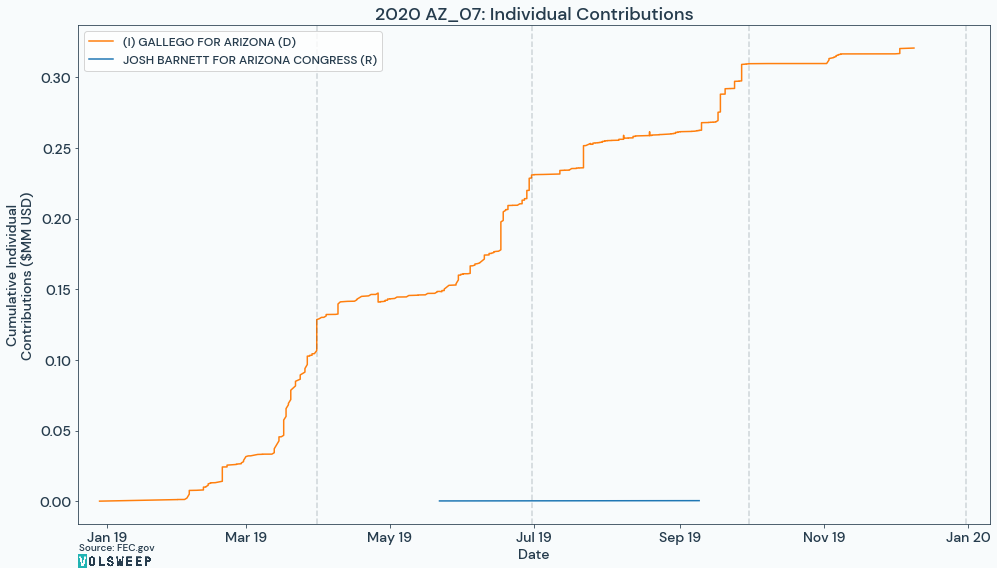

AZ_08


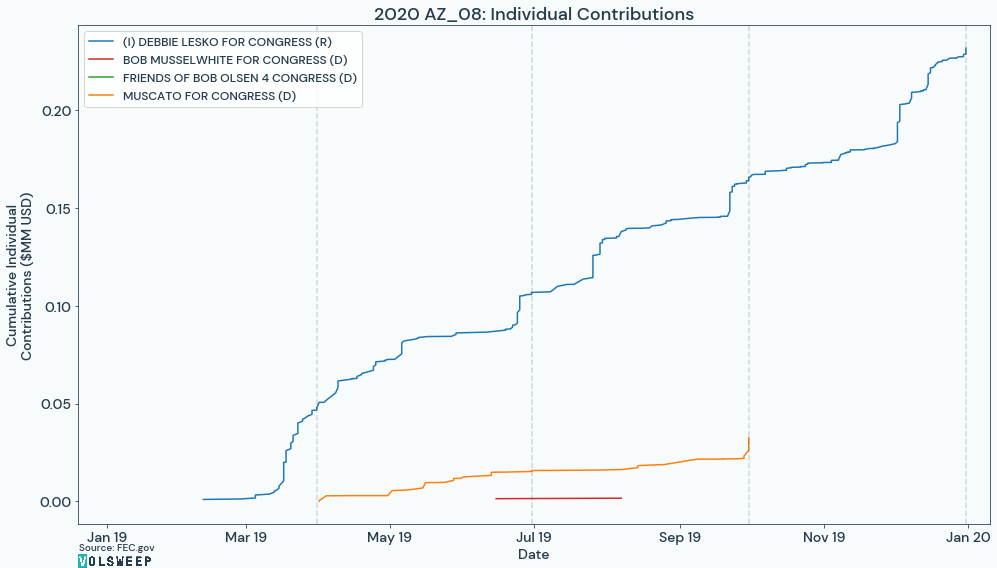

AZ_09


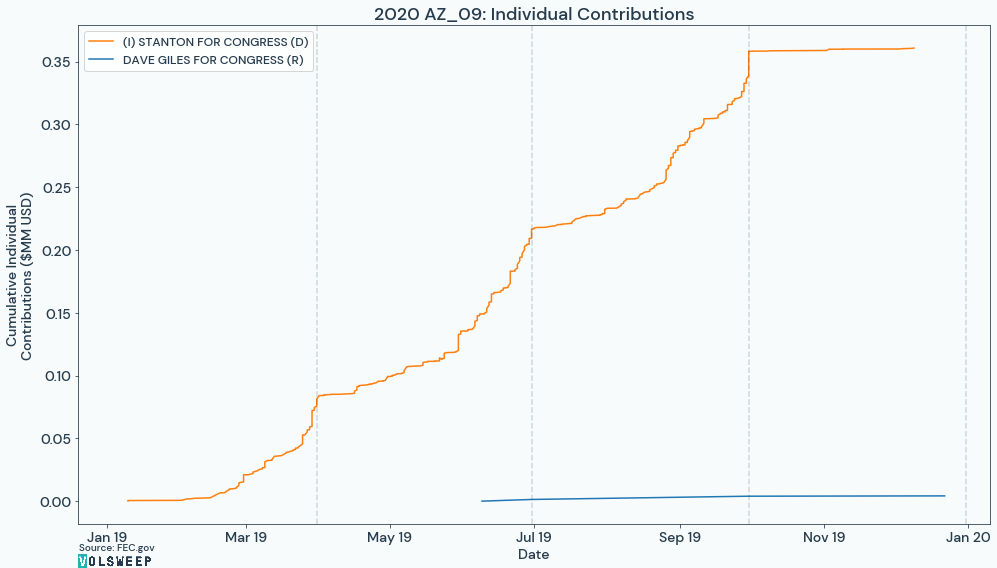

AZ_senate


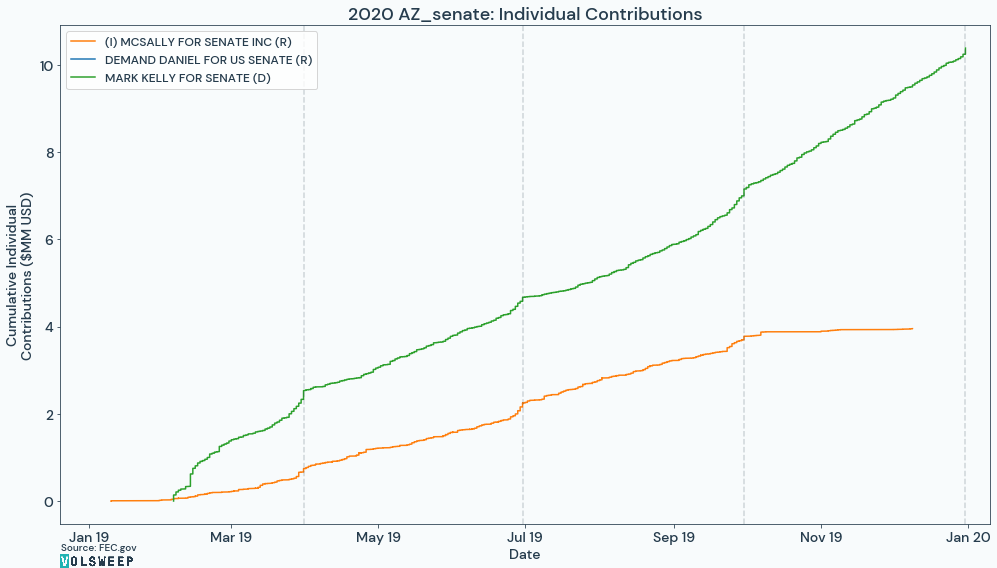

CA_01


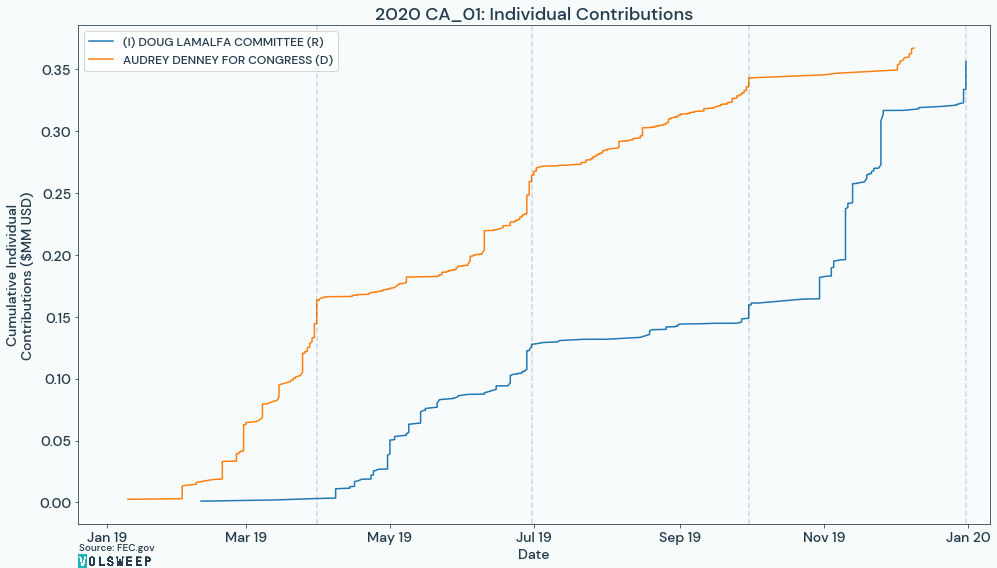

CA_02


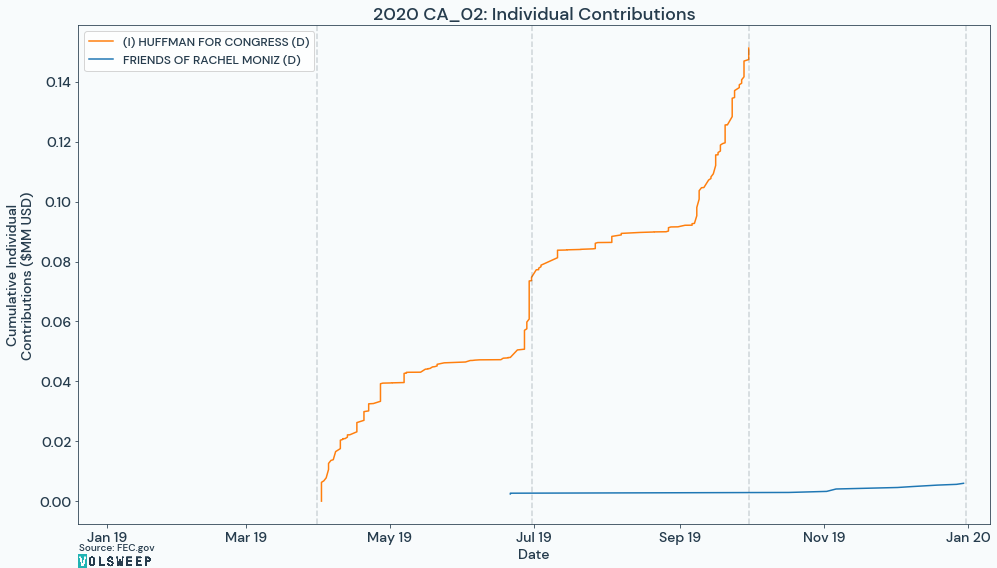

CA_03


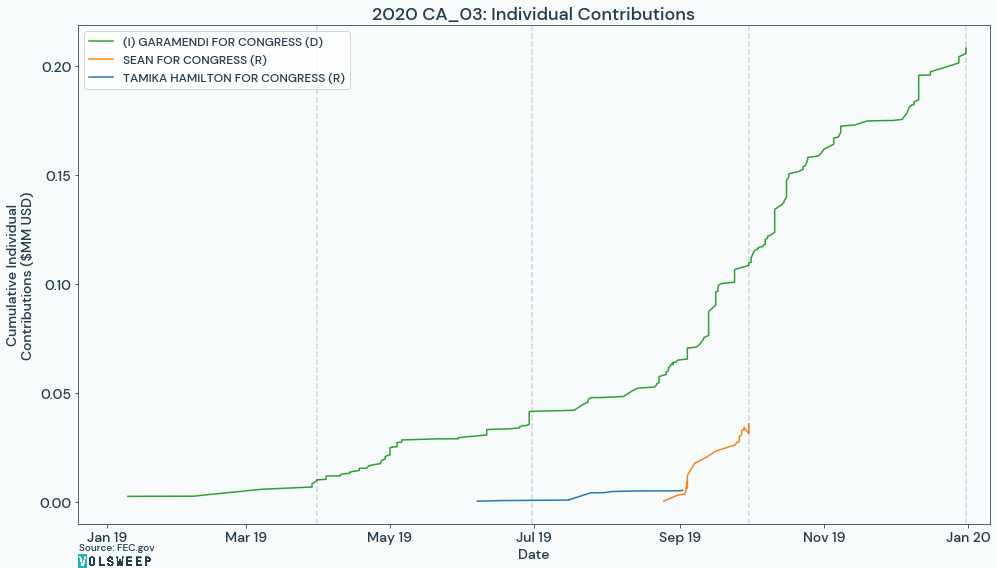

CA_04


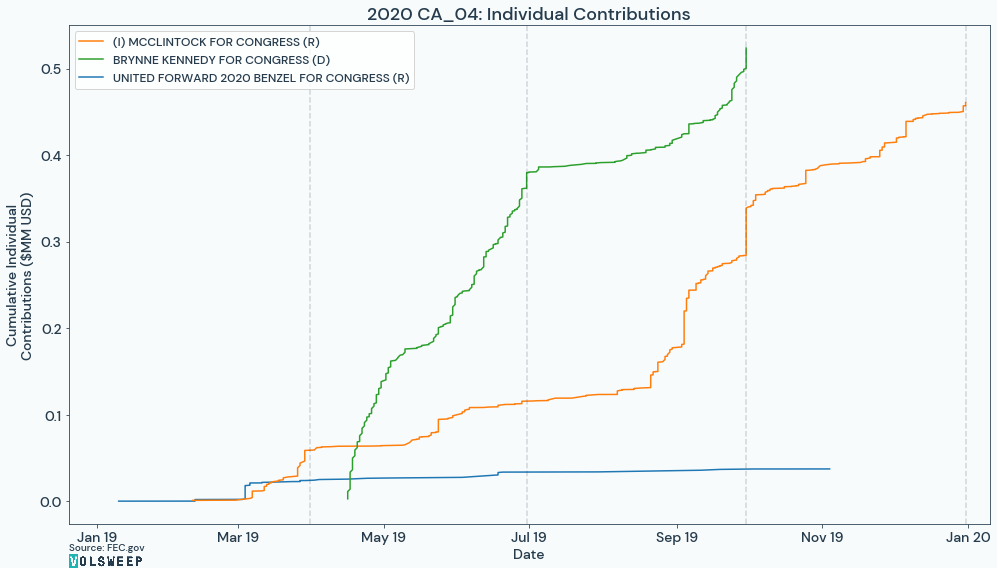

CA_05
CA_06


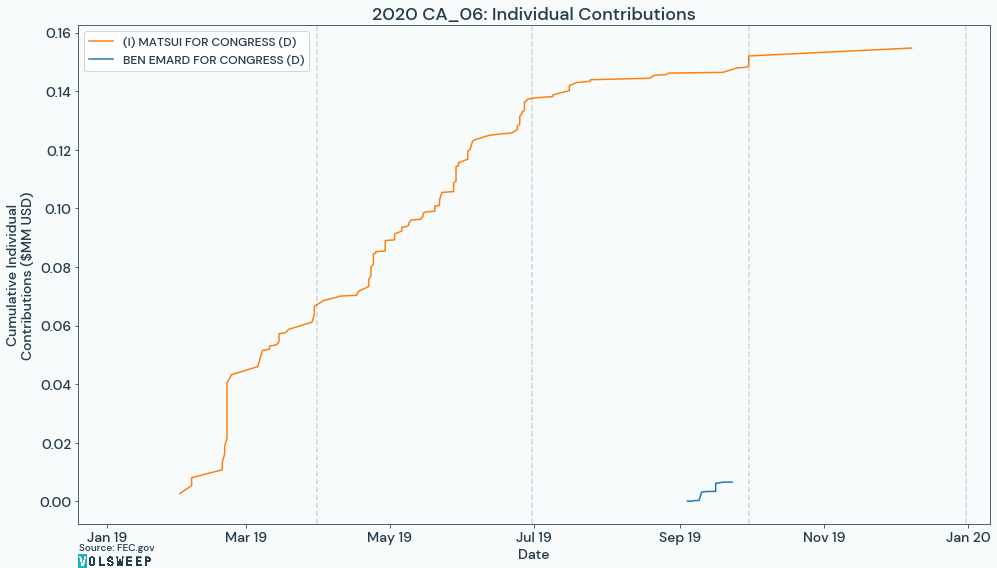

CA_07


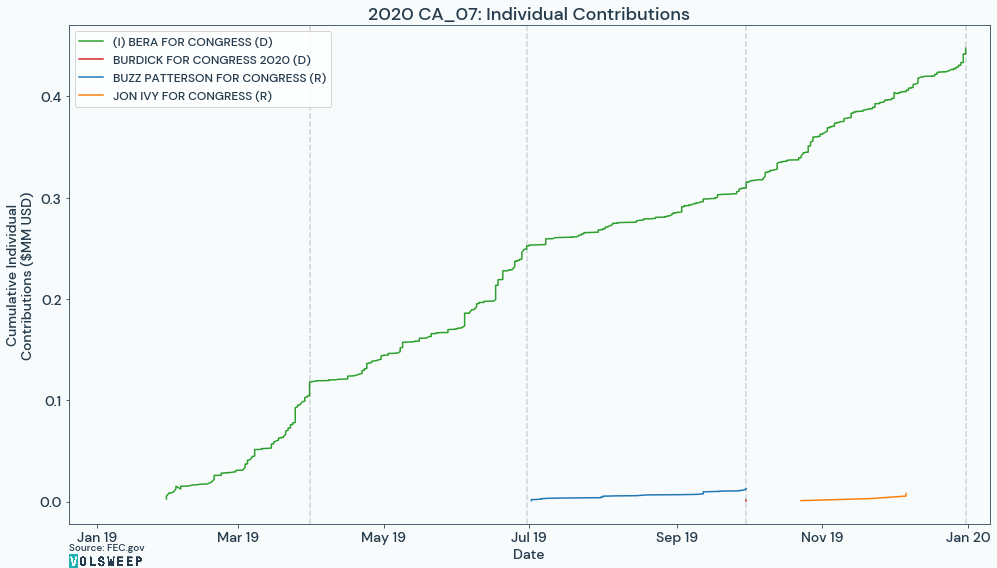

CA_08


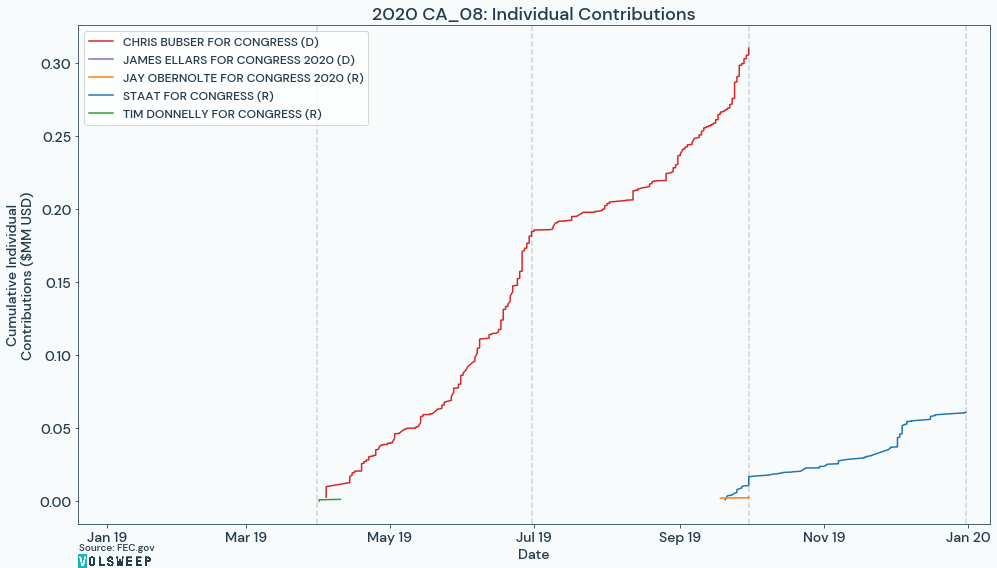

CA_09


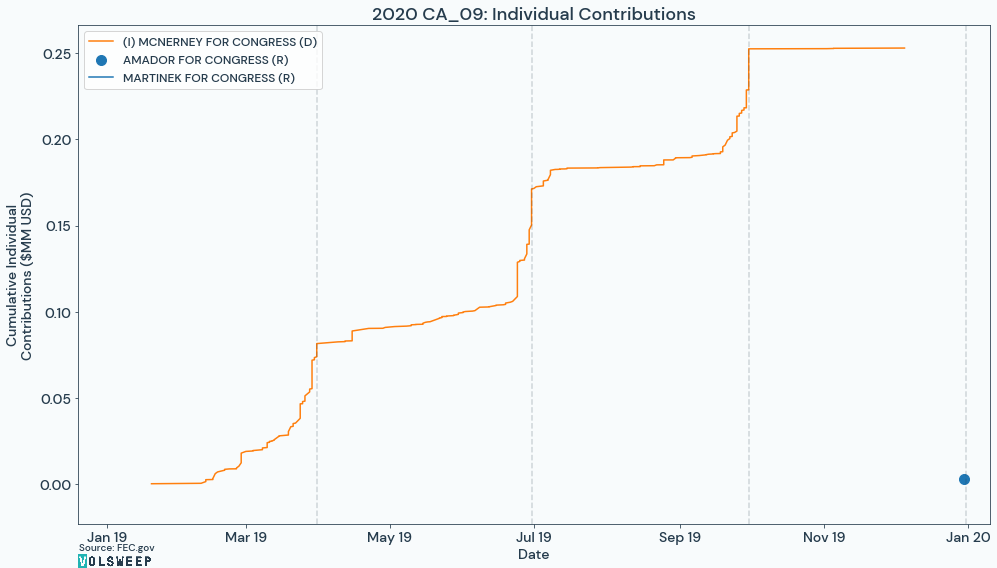

CA_10


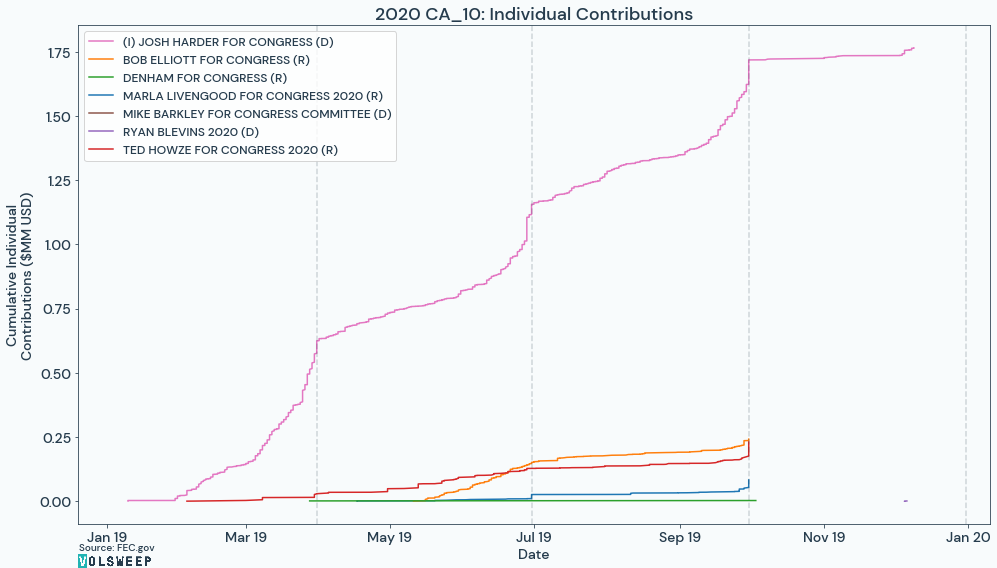

CA_11


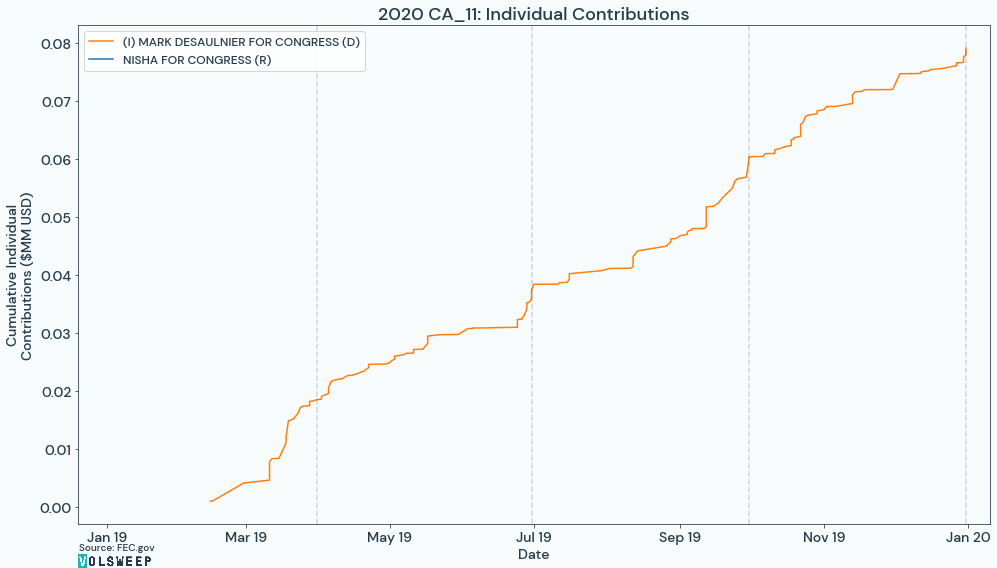

CA_12


KeyboardInterrupt: 

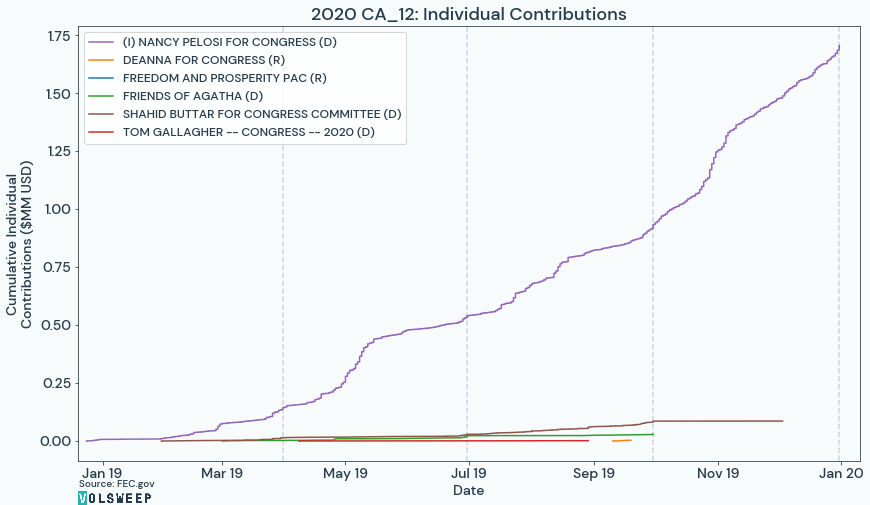

In [12]:
party_dict = {
    'Republican' : {
        'hex' : '#FF6661', 
        'mult' : 0.3, 
        'party' : 'Republican',
    },
    'Democrat' : {
        'hex' : '#5494F7', 
        'mult' : -0.3, 
        'party' : 'Democrat',
    },
    'Third party' : {
        'hex' : '#15DCDC',
        'mult' : 0,
        'party' : 'Third party',
    }
}

vol_light = '#f8fbfc'
vol_dark = '#263C4D'
        
contests = sorted(list(set(cand['contest'])))
for contest in contests:
    print(contest)
    lil_cand = cand[cand['contest'] == contest]
    lil_cand.sort_values(['cand_pty_affiliation'], ascending = False, inplace = True)
    candidates = lil_cand['cand_id'].drop_duplicates().values
    if len(candidates) > 1:
        fig = plt.figure(figsize = (14, 8))
        fig.patch.set_facecolor(vol_light)
        ax = fig.add_subplot(111)
        ax.patch.set_facecolor(vol_light)

        vol_dark_rcparams = [
            'patch.edgecolor',
            'grid.color',
            'text.color',
            'axes.labelcolor',
            'xtick.color',
            'ytick.color',
            'axes.edgecolor'
        ]

        for which in vol_dark_rcparams:
            plt.rcParams[which] = vol_dark

        font_dirs = ['../../css/fonts/for_matplotlib/', ]
        font_files = fm.findSystemFonts(fontpaths=font_dirs)
        font_list = fm.createFontList(font_files)
        fm.fontManager.ttflist.extend(font_list)

        plt.rcParams['font.family'] = 'DM Sans Medium'
        
        for candidate in candidates:
            liller_cand = lil_cand[lil_cand['cand_id'] == candidate]
            party = list(set(liller_cand['cand_pty_affiliation']))[0]
            incumbent = list(set(liller_cand['cand_ici']))[0]
            if incumbent == 'I':
                incumb_flag = '(I) '
            else:
                incumb_flag = ''
            committee = list(cm.loc[cm['cand_id'] == candidate, 'cmte_id'].values)
            if len(committee) > 0:
                committee = committee[0]
                lil_ind = indiv[indiv['cmte_id'] == committee]
                lil_ind.sort_values(['transaction_dt'], ascending = True, inplace = True)
                lil_ind['cumsum'] = lil_ind['transaction_amt'].cumsum()
                if len(lil_ind) == 1:
                    plt.scatter(
                        lil_ind['transaction_dt'],
                        lil_ind['cumsum']/1.0E6,
                        s = 100,
                        label = cm_dict[committee] + f' ({party[0]})',

                    )
                else:
                    plt.plot(
                        lil_ind['transaction_dt'],
                        lil_ind['cumsum']/1.0E6,
                        label = incumb_flag + cm_dict[committee] + \
                        f' ({party[0]})', 

                    )
            else:
                pass

        plt.title(f'{year} {contest}: Individual Contributions', fontsize = 18)
        plt.xlabel('Date', fontsize = 14)  
        plt.xlim([dt.strptime('2018-12-20', '%Y-%m-%d'), 
                  dt.strptime('2020-01-10', '%Y-%m-%d')])
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
        plt.xticks(fontsize = 14)
        plt.ylabel('Cumulative Individual\nContributions ($MM USD)', fontsize = 14)
        plt.yticks(fontsize = 14)
        handles, labels = ax.get_legend_handles_labels()
        # sort both labels and handles by labels
        labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
        ax.legend(
            handles, 
            labels, 
            loc = 'upper left', 
            fontsize = 12, 
            facecolor = vol_light,
            
        )
        
        fec_deadlines = [
            '2019-03-31',
            '2019-06-30',
            '2019-09-30',
            '2019-12-31',
            '2020-03-31',
            '2020-06-30',
            '2020-09-30',
            '2020-10-14', # pre-general
            '2020-11-23', # post-general
            '2020-12-31', # year-end
            
        ]
        for x in fec_deadlines:
            plt.axvline(
                dt.strptime(x, '%Y-%m-%d'), 
                color = vol_dark,
                alpha = 0.1,
                lw = 1.0,
                ls = '--',
                
            )

        x = ax.annotate(
            'Source: FEC.gov', 
            xy=(0.0, 0.0), 
            xytext=(38.0, -28.0), 
            ha='center', 
            va='bottom', 
            textcoords='axes pixels', 
            xycoords='axes pixels', 
        )
        # logo
        arr_img = plt.imread('../../assets/VOL_Logo_Color_Light_Green.png')
        imagebox = OffsetImage(arr_img, zoom=0.07)
        imagebox.image.axes = ax
        xy = (0.0, -45.0)
        ab = AnnotationBbox(imagebox, 
                            xy,
                            xybox=(xy[0], xy[1]),
                            xycoords='axes pixels',
                            boxcoords=('axes pixels'),
                            box_alignment=(0., 0.),
                            frameon=False,
                           )
        ax.add_artist(ab)
        plt.tight_layout()
        plt.show();  

In [ ]:
[x for x in list(cand.columns) if ('cmte_' not in x)]

In [ ]:
cand.loc[cand['contest'] == 'President'].sort_values(['ttl_indiv_contrib'])

In [ ]:
cand.[(cand['cand_id'] == ) & (cand[''])]

In [ ]:
plt.figure(figsize = (12, 8))

for which in ['C00507368', 'C00710566']:
    lil_ind = to_ind[to_ind['cmte_id'] == which]
    lil_ind.sort_values(['transaction_dt'], ascending = True, inplace = True)
    lil_ind['cumsum'] = lil_ind['transaction_amt'].cumsum()
    plt.plot(
        lil_ind['transaction_dt'],
        lil_ind['cumsum'],
        label = cm_dict[which],
        
    )

plt.title('2020 U.S. Congressional Elections\nOhio District 3: Individual Contributions', fontsize = 18)
plt.xlabel('Date', fontsize = 14)   
plt.ylabel('Individual Contributions (cumulative)', fontsize = 14)
plt.legend()
plt.show();

In [ ]:
indiv['cmte_name'] = [cm_dict[x] for x in indiv['cmte_id']]
indiv['cand_link'] = [ccl_dict[x] if x in list(ccl_dict.keys()) else \
                      np.nan for x in indiv['cmte_id']]

In [ ]:
indiv[indiv['cmte_id'] == 'C00710566'].sort_values(['transaction_amt'], ascending = False)

In [ ]:
indiv[indiv['cmte_id'] == 'C00507368'].sort_values(['transaction_amt'], ascending = False)

In [ ]:
indiv.loc[indiv['cmte_id'] == 'C00507368', 'state'].value_counts()

In [ ]:
indiv.loc[indiv['cmte_id'] == 'C00710566', 'state'].value_counts()

In [ ]:
ccl[ccl['cand_id'] == 'P60007168']

In [ ]:
indiv.loc[indiv['cmte_id'] == 'C00577130', 'state'].value_counts()

In [ ]:
indiv.loc[
    (indiv['cmte_id'] == 'C00696948') & \
    (indiv['state'] == 'NY'), 'name'].value_counts()

In [ ]:
indiv.loc[
    (indiv['cmte_id'] == 'C00696948') & \
    (indiv['state'] == 'NY'), 'employer'].value_counts()

In [ ]:
indiv[
    (indiv['cmte_id'] == 'C00696948') & \
    (indiv['state'] == 'NY') & \
    (indiv['employer'] == 'FRIED FRANK LLP')]

In [ ]:
indiv[indiv['name'] == 'FAISON, EDWARD']

In [ ]:
indiv[
    (indiv['cmte_id'] == 'C00696948') & \
    (indiv['state'] == 'NY')].sort_values(['transaction_amt'], ascending = False)[:10]

In [ ]:
indiv.loc[indiv['cmte_id'] == 'C00696948', 'state'].value_counts()

In [ ]:
pccs = list(set(ccl_red['cmte_id']))
indiv_pcc = indiv[indiv['cmte_id'].apply(lambda x: x in pccs)]
indiv_pcc = indiv_pcc[indiv_pcc['transaction_dt'] < dt.strptime('09012019', '%m%d%Y')]

In [ ]:
check = list(indiv_pcc['cmte_id'].value_counts().index)

these = []
for which in check:
    this = cand.loc[
        (cand['cand_id'] == list(ccl_red.loc[ccl_red['cmte_id'] == which, 'cand_id'].values)[0]) & \
        (cand['position'] == 'P'), 
        ['cand_id', 'cand_name', 'contest']
    ]
    if len(this) > 0:
        these.append(which)
        print(this)

In [ ]:
plt.figure(figsize = (12, 8))

for which in these:
    lil_pcc = indiv_pcc[indiv_pcc['cmte_id'] == which]
    lil_pcc.sort_values(['transaction_dt'], ascending = True, inplace = True)
    lil_pcc['cumsum'] = lil_pcc['transaction_amt'].cumsum()
    name = cand.loc[
        (cand['cand_id'] == list(ccl_red.loc[ccl_red['cmte_id'] == which, 'cand_id'].values)[0]) & \
        (cand['position'] == 'P'), 'cand_name']
    plt.plot(
        lil_pcc['transaction_dt'],
        lil_pcc['cumsum']/1.0E6,
        label = lil_pcc,
        
    )

plt.title('2020 U.S. Presidential Contest\nIndividual Contributions', fontsize = 18)
plt.xlabel('Date', fontsize = 14)   
plt.ylabel('Individual Contributions (cumulative)', fontsize = 14)
plt.show();

In [ ]:
indiv_pcc.isnull().sum()[indiv_pcc.isnull().sum() > 0].sort_values()

In [ ]:
indiv_pcc['name'].value_counts()[indiv_pcc['name'].value_counts() > 1][:20]

In [ ]:
employer_dict = {
    'SELF' : 'SELF-EMPLOYED',
    'SELF EMPLOYED' : 'SELF-EMPLOYED',
    'NONE' : 'NOT EMPLOYED',
    'NOT-EMPLOYED' : 'NOT EMPLOYED',
    'UNEMPLOYED' : 'NOT EMPLOYED',
    'COMCAST (CC) OF WILLOW GROVE' : 'COMCAST',
    'AT&T SERVICES, INC.' : 'AT&T',
    'AT&T MOBILITY SERVICES LLC' : 'AT&T',
    'DELTA' : 'DELTA AIR LINES',
    'PWC' : 'PRICEWATERHOUSECOOPERS, LLP',
    'HOME DEPOT' : 'HOME DEPOT U.S.A., INC.',
    'FORD' : 'FORD MOTOR COMPANY',
    'UPS' : 'UNITED PARCEL SERVICE INC.',
    'UNITED PARCEL SERVICE' : 'UNITED PARCEL SERVICE INC.',
    'ELI LILLY' : 'ELI LILLY AND COMPANY',
    'WALMART' : 'WALMART INC',
    'JPMC' : 'JPMORGAN CHASE BANK, NA',
    'MERCK' : 'MERCK SHARP & DOHME',
    'FAA' : 'FEDERAL AVIATION ADMINISTRATION',
    'RAYTHEON' : 'RAYTHEON COMPANY',
    'HONEYWELL' : 'HONEYWELL INTERNATIONAL',
    'GENERAL MOTORS' : 'GENERAL MOTORS COMPANY',
    'PFIZER' : 'PFIZER INC',
    'KPMG' : 'KPMG LLP',
    'DELOITTE' : 'DELOITTE & TOUCHE LLP',
    'ANTHEM' : 'THE ANTHEM COMPANIES, INC.',
    'AMGEN' : 'AMGEN INC.',
    'ABBVIE' : 'ABBVIE INC.',
    'EXELON' : 'EXELON CORP',
    'CATERPILLAR' : 'CATERPILLAR INC.',
    'GOOGLE LLC' : 'GOOGLE',
    'HUMANA, INC.' : 'HUMANA',
    'PRUDENTIAL' : 'PRUDENTIAL FINANCIAL, INC.',
    'PNC' : 'PNC BANK NA',
    'GENENTECH' : 'GENENTECH, USA',
    'ASTRAZENECA' : 'ASTRAZENECA PHARMACEUTICALS L.P.',
    'WELLS FARGO' : 'WELLS FARGO BANK, N. A.',
    'CENTENE' : 'CENTENE CORPORATION',
    'CVS' : 'CVS HEALTH',
    'AMERICAN AIRLINES, INC.' : 'AMERICAN AIRLINES',
    'LOCKHEED' : 'LOCKHEED MARTIN',
    
}

indiv_pcc['employer'] = [employer_dict[x] if x in list(employer_dict.keys()) else x for x in indiv_pcc['employer']]
indiv_pcc.drop_duplicates('name')['employer'].value_counts()[:20]

In [ ]:
indiv.drop_duplicates('name')['employer'].value_counts()[80:100]

In [ ]:
list(set(indiv.loc[indiv['employer'].apply(lambda x: 'AMAZON' in str(x)), 'employer']))

In [ ]:
indiv[indiv['employer'] == 'LOCKHEED']

In [ ]:
nonames = list(indiv.loc[
    indiv['name'].isnull(), 
    'cmte_id'
].value_counts()[indiv.loc[indiv['name'].isnull(), 'cmte_id'].value_counts() > 10].index)

nonames

In [ ]:
cm = pd.read_csv('data/03/committees_03a.csv')
cm.head(2)

In [ ]:
for cmte_id in nonames:
    cmte_name = list(cm.loc[cm['cmte_id'] == cmte_id, ['cmte_nm', 'connected_org_nm']].values)[0]
    count = len(indiv.loc[
    (indiv['cmte_id'] == cmte_id) & \
    (indiv['name'].isnull()), 
    'transaction_amt', 
    ])
    total = indiv.loc[
    (indiv['cmte_id'] == cmte_id) & \
    (indiv['name'].isnull()), 
    'transaction_amt', 
    ].sum()
    
    print(cmte_name)
    print('no-name count:', count)
    print('no-name sum:', total)
    print('\n')

In [ ]:
indiv.loc[
    (indiv['cmte_id'] == 'C00326801') & \
    (indiv['name'].isnull()), 
    'transaction_amt'
].sort_values(ascending = False)

In [ ]:
list(indiv.columns)

In [ ]:
indiv['cmte_id'].value_counts()[indiv['cmte_id'].value_counts() > 1]

In [ ]:
cm[cm['cmte_id'] == 'C00401224']

In [ ]:
indiv['rpt_tp'].value_counts()

In [ ]:
# cand.to_csv('assets/cand_cleaned_02.csv', index = False)